# K-Nearest Neighbors (KNN)

##Code
K-Nearest Neighbors (KNN) is a simple algorithm used for classifying data points based on their proximity to other data points. Given a new, unclassified data point, KNN identifies the 'K' closest data points (neighbors) from the training dataset. The class that appears most frequently among these 'K' neighbors is then assigned as the class of the new data point.

In [ ]:
#Counter is used to count the occurrences of elements in a list or iterable. In KNN after finding the k nearest neighbor labels Counter helps count how many times each label appears.

import numpy as np
from collections import Counter

In [ ]:
#euclidean_distance is to calculate euclidean distance between points.

def euclidean_distance(point1, point2):
    return np.sqrt(np.sum((np.array(point1) - np.array(point2))**2))

In [ ]:
"""
distances.append saves how far each training point is from the test point, along with its label.
distances.sort is used to sorts the list so the nearest points come first.
k_nearest_labels picks the labels of the k closest points.
Uses Counter to find which label appears most among those k labels that becomes the prediction.
"""

def knn_predict(training_data, training_labels, test_point, k):
    distances = []
    for i in range(len(training_data)):
        dist = euclidean_distance(test_point, training_data[i])
        distances.append((dist, training_labels[i]))
    distances.sort(key=lambda x: x[0])
    k_nearest_labels = [label for _, label in distances[:k]]
    return Counter(k_nearest_labels).most_common(1)[0][0]

In [ ]:
training_data = [[1, 2], [2, 3], [3, 4], [6, 7], [7, 8]]
training_labels = ['A', 'A', 'A', 'B', 'B']
test_point = [4, 5]
k = 3

In [ ]:
prediction = knn_predict(training_data, training_labels, test_point, k)
print(prediction)

A


##Explaination

**Training data and labels**

| Point | Coordinates | Label |
| ----- | ----------- | ----- |
| P1    | (1, 2)      | A     |
| P2    | (2, 3)      | A     |
| P3    | (3, 4)      | A     |
| P4    | (6, 7)      | B     |
| P5    | (7, 8)      | B     |

**Test point:**
[
T = (4, 5)
]

**k = 3**

KNN will:

1. Compute the distance from the test point to every training point
2. Select the 3 closest points
3. Assign the majority label among those neighbors

---

## 2. Distance calculation (Euclidean distance)

The Euclidean distance between two points ((x_1, y_1)) and ((x_2, y_2)) is:

[
d = \sqrt{(x_2 - x_1)^2 + (y_2 - y_1)^2}
]

### Distances to each training point

1. **To (1, 2), label A**
   [
   \sqrt{(4-1)^2 + (5-2)^2} = \sqrt{9 + 9} = \sqrt{18} \approx 4.24
   ]

2. **To (2, 3), label A**
   [
   \sqrt{(4-2)^2 + (5-3)^2} = \sqrt{4 + 4} = \sqrt{8} \approx 2.83
   ]

3. **To (3, 4), label A**
   [
   \sqrt{(4-3)^2 + (5-4)^2} = \sqrt{1 + 1} = \sqrt{2} \approx 1.41
   ]

4. **To (6, 7), label B**
   [
   \sqrt{(4-6)^2 + (5-7)^2} = \sqrt{4 + 4} = \sqrt{8} \approx 2.83
   ]

5. **To (7, 8), label B**
   [
   \sqrt{(4-7)^2 + (5-8)^2} = \sqrt{9 + 9} = \sqrt{18} \approx 4.24
   ]

---

## 3. Identify the 3 nearest neighbors

Sorted by distance (smallest first):

| Distance | Point  | Label |
| -------- | ------ | ----- |
| 1.41     | (3, 4) | A     |
| 2.83     | (2, 3) | A     |
| 2.83     | (6, 7) | B     |
| 4.24     | (1, 2) | A     |
| 4.24     | (7, 8) | B     |

**The 3 nearest neighbors are:**

* (3, 4) → A
* (2, 3) → A
* (6, 7) → B

---

## 4. Majority vote

Among the 3 neighbors:

* **A:** 2 votes
* **B:** 1 vote

---

## 5. Final classification

Since **A** has the majority among the nearest neighbors, the KNN classifier assigns:

[
\boxed{\text{Predicted label = A}}
]

---

## 6. Intuitive interpretation

The test point (4, 5) lies closer to the cluster of **A** points (which are around the line from (1,2) to (3,4)) than to the **B** cluster (which starts at (6,7)). With k = 3, the local neighborhood is dominated by class **A**, leading to that classification.

#Logistic Regression

Logistic Regression is a method used to predict the probability of a categorical outcome. Instead of predicting a continuous value, it predicts whether something belongs to a certain category (like yes/no, true/false, or 0/1). It does this by using a logistic function (also known as a sigmoid function) to squeeze the output of a linear equation between 0 and 1, representing the probability of belonging to that category. The model learns the best coefficients for the linear equation based on the training data.

###Binomial Logistic regression:
In binomial logistic regression, the target variable can only have two possible values such as "0" or "1", "pass" or "fail". The sigmoid function is used for prediction.

We will be using sckit-learn library for this and shows how to use the breast cancer dataset to implement a Logistic Regression model for classification.

In [65]:
from sklearn.datasets import load_breast_cancer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

X, y = load_breast_cancer(return_X_y=True)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=23)

clf = LogisticRegression(max_iter=10000, random_state=0)
clf.fit(X_train, y_train)

acc = accuracy_score(y_test, clf.predict(X_test)) * 100
print(f"Logistic Regression model accuracy: {acc:.2f}%")

Logistic Regression model accuracy: 96.49%


###Multinomial Logistic Regression

Target variable can have 3 or more possible types which are not ordered i.e types have no quantitative significance like “disease A” vs “disease B” vs “disease C”.

In this case, the softmax function is used in place of the sigmoid function. Softmax function for K classes will be:

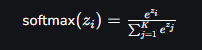

Here
K represents the number of elements in the vector
z and
i,j iterates over all the elements in the vector.

In [66]:
from sklearn.model_selection import train_test_split
from sklearn import datasets, linear_model, metrics

digits = datasets.load_digits()

X = digits.data
y = digits.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=1)

reg = linear_model.LogisticRegression(max_iter=10000, random_state=0)
reg.fit(X_train, y_train)

y_pred = reg.predict(X_test)

print(f"Logistic Regression model accuracy: {metrics.accuracy_score(y_test, y_pred) * 100:.2f}%")

Logistic Regression model accuracy: 96.66%


The confusion can come from the module name.

"linear_model.LogisticRegression". This can be explained as follow

* linear_model is just the name of the scikit-learn module that groups models whose decision function is linear in the parameters.

* LogisticRegression is a logistic regression classifier, not linear regression.

Why logistic regression is in linear_model

Logistic regression is considered a linear model because:
The model computes a linear combination of the inputs:

𝑧 =
𝑤
1
𝑥
1
+
𝑤
2
𝑥
2
+
⋯
+
𝑏

That linear score is then passed through a logistic (sigmoid) function to produce probabilities.

So the structure is:

* Linear decision function

* Logistic (nonlinear) link function

Note that: This does not involve linear regression (e.g., LinearRegression) in any way.